   position             team  played        won     drawn      lost  \
0         1    Real Sociedad      30  16.764706  6.176471  7.058824   
1         2      Real Madrid      30  17.647059  4.411765  7.941176   
2         3  Atlético Madrid      30  15.000000  7.058824  7.941176   
3         4         Valencia      30  14.117647  8.823529  7.058824   
4         5        Barcelona      30  15.882353  4.411765  9.705882   

   goals_for  goals_against  goal_difference     points  year  
0      0.052          0.029            0.023  44.117647  1980  
1      0.066          0.037            0.029  44.117647  1980  
2      0.059          0.041            0.018  41.176471  1980  
3      0.046          0.039            0.007  41.176471  1980  
4      0.066          0.041            0.025  40.196078  1980  
(186, 11)
position             int64
team                object
played               int64
won                float64
drawn              float64
lost               float64
goals_for        

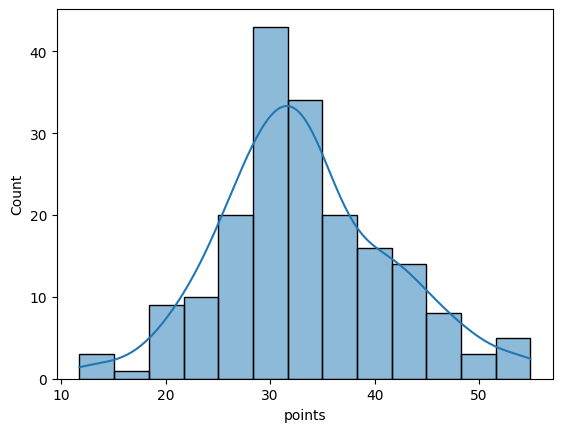

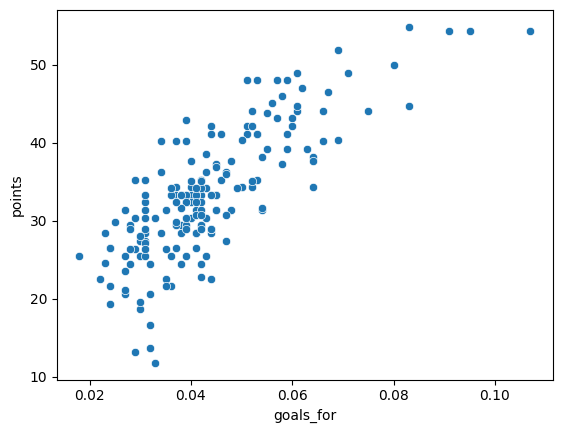

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

la_liga = pd.read_csv("../normalized_data/1980-1990.csv")




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()



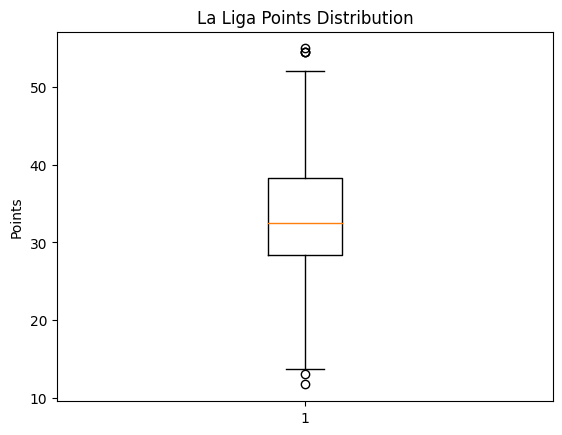

upper bound:  52.94117647058823
lower bound:  13.725490196078429
Outliers:
     position         team  played        won     drawn       lost  goals_for  \
35         18    Castellón      30   2.647059  5.294118  22.058824      0.033   
90          1  Real Madrid      30  22.941176  3.529412   3.529412      0.083   
126         1  Real Madrid      30  22.105263  4.736842   3.157895      0.095   
146         1  Real Madrid      30  19.736842  9.473684   0.789474      0.091   
165        20        Elche      30   3.157895  5.526316  21.315789      0.029   
166         1  Real Madrid      30  20.526316  7.894737   1.578947      0.107   

     goals_against  goal_difference     points  year  
35           0.082           -0.049  11.764706  1981  
90           0.033            0.050  54.901961  1985  
126          0.026            0.069  54.385965  1987  
146          0.037            0.054  54.385965  1988  
165          0.071           -0.042  13.157895  1988  
166          0.038         

In [6]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()

q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print("upper bound: ",upper_bound)
print("lower bound: ",lower_bound)

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

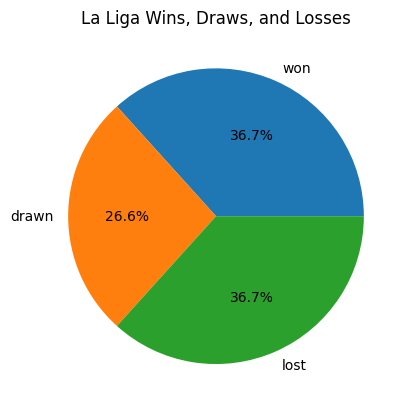

In [7]:
arr=[]
year1=1980
year2=1981
while(year1!=1990):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']

plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('La Liga Wins, Draws, and Losses')

plt.show()

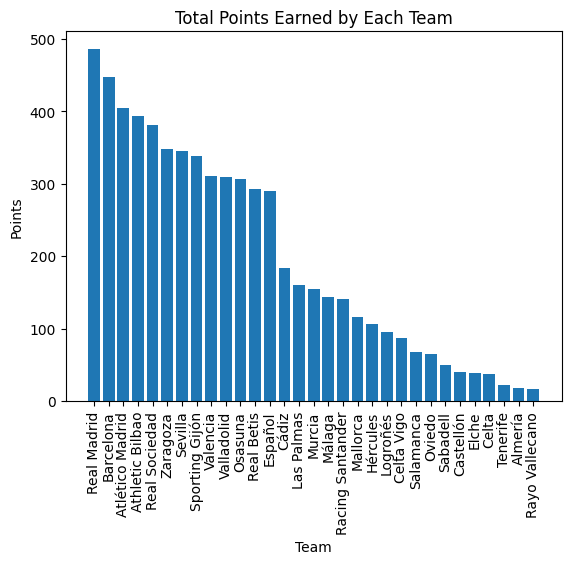

In [8]:
df=pd.read_csv("../normalized_data/1980-1990.csv")

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

